# Convolutional Neural Network (CNN)

## this notbook demonstrates using a CNN Model to classify 7 facial Emotions and correctly predict them using images or frames
## This notbook uses keras and tensorflow to load the data from Directory und feed them to the Sequential model

Imports

In [2]:
from keras import models , layers , utils
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np


specify the Important parameters and the Classes


In [ ]:
classes = ["0","1","2","3","4","5","6"]
class_names = ["angry","disgust","fear","happy","neutral","sad","surprised"]
train_dir = "src/train"
val_dir = "src/train_smal"


BATCH_SZIZE = 128
IMG_SIZE = (160, 160)

In [ ]:
# load the training and Validation data from Directory
# the used dataset:  FER-2013/Kaggle        https://www.kaggle.com/datasets/msambare/fer2013?select=test

In [ ]:
train_images = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                           #shuffle=True,
                                                           batch_size=BATCH_SZIZE,
                                                           image_size=IMG_SIZE
                                                           )


test_images = tf.keras.utils.image_dataset_from_directory(val_dir,
                                                          shuffle=True,
                                                          batch_size=BATCH_SZIZE,
                                                          image_size=IMG_SIZE
                                                          )

# create the model and its layers
# Note that the Images are not getting rescaled
# instade of it we are using a Rescalinglayer in the model after the input layer

In [1]:



model = models.Sequential()
model.add(layers.InputLayer(input_shape=(160,160,3)))
model.add(layers.Rescaling(scale=1./255.))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(7 , activation="softmax"))


model.compile(tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics=['accuracy'])

history = model.fit(train_images, epochs=15,
                     validation_data=test_images)




Found 28709 files belonging to 7 classes.
Metal device set to: Apple M1


2022-05-09 20:41:37.169527: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-05-09 20:41:37.169626: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Found 6459 files belonging to 7 classes.
Epoch 1/15


/Users/anasarodake/miniforge3/envs/deep/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
2022-05-09 20:41:37.811902: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-05-09 20:41:37.812316: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


225/225 [==============================] - ETA: 0s - loss: 1.7770 - accuracy: 0.2713

2022-05-09 20:44:41.724115: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


225/225 [==============================] - 195s 864ms/step - loss: 1.7770 - accuracy: 0.2713 - val_loss: 1.7870 - val_accuracy: 0.3052
Epoch 2/15
225/225 [==============================] - 190s 845ms/step - loss: 1.6154 - accuracy: 0.3614 - val_loss: 1.6616 - val_accuracy: 0.3753
Epoch 3/15
225/225 [==============================] - 193s 856ms/step - loss: 1.4994 - accuracy: 0.4155 - val_loss: 1.6067 - val_accuracy: 0.3937
Epoch 4/15
225/225 [==============================] - 167s 742ms/step - loss: 1.4250 - accuracy: 0.4439 - val_loss: 1.4584 - val_accuracy: 0.4487
Epoch 5/15
225/225 [==============================] - 168s 746ms/step - loss: 1.3607 - accuracy: 0.4703 - val_loss: 1.4285 - val_accuracy: 0.4569
Epoch 6/15
225/225 [==============================] - 166s 736ms/step - loss: 1.3019 - accuracy: 0.4980 - val_loss: 1.3158 - val_accuracy: 0.5101
Epoch 7/15
225/225 [==============================] - 185s 821ms/step - loss: 1.2330 - accuracy: 0.5247 - val_loss: 1.2448 - val_accura

# we keep watching the Accuracy and train the model for further 10 Epochs

In [2]:


history2 = model.fit(train_images, epochs=10,
                    validation_data=test_images)

Epoch 1/10
225/225 [==============================] - 206s 906ms/step - loss: 0.7584 - accuracy: 0.7104 - val_loss: 0.7513 - val_accuracy: 0.7229
Epoch 2/10
225/225 [==============================] - 202s 894ms/step - loss: 0.7151 - accuracy: 0.7250 - val_loss: 0.7248 - val_accuracy: 0.7339
Epoch 3/10
225/225 [==============================] - 185s 820ms/step - loss: 0.6842 - accuracy: 0.7364 - val_loss: 0.7142 - val_accuracy: 0.7351
Epoch 4/10
225/225 [==============================] - 182s 807ms/step - loss: 0.6646 - accuracy: 0.7447 - val_loss: 0.6274 - val_accuracy: 0.7712
Epoch 5/10
225/225 [==============================] - 195s 868ms/step - loss: 0.6353 - accuracy: 0.7567 - val_loss: 0.5987 - val_accuracy: 0.7817
Epoch 6/10
225/225 [==============================] - 192s 855ms/step - loss: 0.6092 - accuracy: 0.7652 - val_loss: 0.5882 - val_accuracy: 0.7837
Epoch 7/10
225/225 [==============================] - 197s 877ms/step - loss: 0.5937 - accuracy: 0.7729 - val_loss: 0.5789 -

In [3]:
history3 = model.fit(train_images, epochs=10,
                    validation_data=test_images)

Epoch 1/10
225/225 [==============================] - 193s 859ms/step - loss: 0.5235 - accuracy: 0.7983 - val_loss: 0.5059 - val_accuracy: 0.8124
Epoch 2/10
225/225 [==============================] - 207s 921ms/step - loss: 0.5164 - accuracy: 0.8035 - val_loss: 0.5109 - val_accuracy: 0.8128
Epoch 3/10
225/225 [==============================] - 165s 733ms/step - loss: 0.4924 - accuracy: 0.8101 - val_loss: 0.4857 - val_accuracy: 0.8252
Epoch 4/10
225/225 [==============================] - 154s 684ms/step - loss: 0.4909 - accuracy: 0.8088 - val_loss: 0.5045 - val_accuracy: 0.8185
Epoch 5/10
225/225 [==============================] - 175s 778ms/step - loss: 0.4783 - accuracy: 0.8148 - val_loss: 0.4712 - val_accuracy: 0.8373
Epoch 6/10
225/225 [==============================] - 184s 818ms/step - loss: 0.4711 - accuracy: 0.8202 - val_loss: 0.5011 - val_accuracy: 0.8257
Epoch 7/10
225/225 [==============================] - 155s 687ms/step - loss: 0.4696 - accuracy: 0.8201 - val_loss: 0.4986 -

In [4]:
history4 = model.fit(train_images, epochs=10,
                    validation_data=test_images)

Epoch 1/10
225/225 [==============================] - 162s 719ms/step - loss: 0.4327 - accuracy: 0.8353 - val_loss: 0.4430 - val_accuracy: 0.8398
Epoch 2/10
225/225 [==============================] - 145s 645ms/step - loss: 0.4210 - accuracy: 0.8395 - val_loss: 0.4328 - val_accuracy: 0.8463
Epoch 3/10
225/225 [==============================] - 148s 659ms/step - loss: 0.4191 - accuracy: 0.8393 - val_loss: 0.4663 - val_accuracy: 0.8391
Epoch 4/10
225/225 [==============================] - 144s 639ms/step - loss: 0.4168 - accuracy: 0.8406 - val_loss: 0.4678 - val_accuracy: 0.8463
Epoch 5/10
225/225 [==============================] - 150s 666ms/step - loss: 0.4120 - accuracy: 0.8432 - val_loss: 0.4629 - val_accuracy: 0.8489
Epoch 6/10
225/225 [==============================] - 146s 649ms/step - loss: 0.4096 - accuracy: 0.8462 - val_loss: 0.4395 - val_accuracy: 0.8552
Epoch 7/10
225/225 [==============================] - 146s 648ms/step - loss: 0.4063 - accuracy: 0.8452 - val_loss: 0.4361 -

In [5]:
history5 = model.fit(train_images, epochs=10,
                    validation_data=test_images)

Epoch 1/10
225/225 [==============================] - 170s 753ms/step - loss: 0.3761 - accuracy: 0.8570 - val_loss: 0.4590 - val_accuracy: 0.8535
Epoch 2/10
225/225 [==============================] - 148s 655ms/step - loss: 0.3750 - accuracy: 0.8548 - val_loss: 0.3871 - val_accuracy: 0.8735
Epoch 3/10
225/225 [==============================] - 152s 673ms/step - loss: 0.3765 - accuracy: 0.8576 - val_loss: 0.4416 - val_accuracy: 0.8520
Epoch 4/10
225/225 [==============================] - 149s 663ms/step - loss: 0.3660 - accuracy: 0.8598 - val_loss: 0.3640 - val_accuracy: 0.8799
Epoch 5/10
225/225 [==============================] - 173s 769ms/step - loss: 0.3709 - accuracy: 0.8610 - val_loss: 0.3487 - val_accuracy: 0.8840
Epoch 6/10
225/225 [==============================] - 162s 722ms/step - loss: 0.3849 - accuracy: 0.8551 - val_loss: 0.3546 - val_accuracy: 0.8809
Epoch 7/10
225/225 [==============================] - 156s 691ms/step - loss: 0.3571 - accuracy: 0.8639 - val_loss: 0.3961 -

In [ ]:

# plt.plot(history.history['accuracy'], label='accuracy')
# plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# #plt.ylim([0.5, 1])
# plt.legend(loc='lower right')
# plt.show()
# plt.plot(history.history['loss'], label='loss')
# plt.plot(history.history['val_loss'], label = 'val_loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# #plt.ylim([0.5, 1])
# plt.legend(loc='lower right')


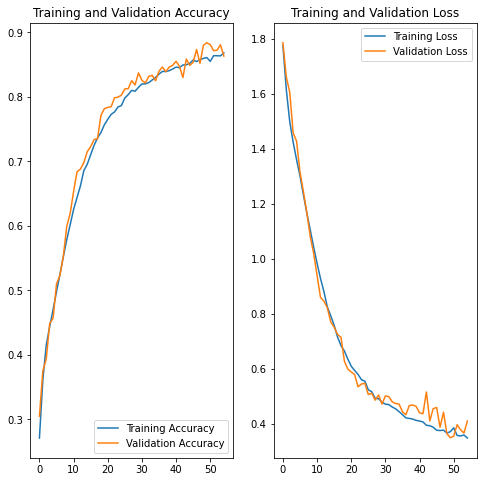

In [7]:
acc = history.history['accuracy'] +history2.history['accuracy'] +history3.history['accuracy'] +history4.history['accuracy'] +history5.history['accuracy']
val_acc = history.history['val_accuracy'] +history2.history['val_accuracy'] +history3.history['val_accuracy'] +history4.history['val_accuracy'] +history5.history['val_accuracy']

loss = history.history['loss'] +  history2.history['loss'] +  history3.history['loss'] +  history4.history['loss'] +  history5.history['loss']
val_loss = history.history['val_loss'] + history2.history['val_loss'] + history3.history['val_loss'] + history4.history['val_loss'] + history5.history['val_loss']

epochs_range = range(55)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [8]:
test_images2 = tf.keras.utils.image_dataset_from_directory("src/train_smal",
                                                          shuffle=True,
                                                          batch_size=BATCH_SZIZE,
                                                          image_size=IMG_SIZE
                                                          )
model.evaluate(test_images2)

Found 6459 files belonging to 7 classes.
51/51 [==============================] - 11s 185ms/step - loss: 0.4097 - accuracy: 0.8633


[0.40974026918411255, 0.8632915616035461]

In [9]:

test_images2 = tf.keras.utils.image_dataset_from_directory("/Users/anasarodake/anas_fotos/test",
                                                           shuffle=True,
                                                           batch_size=BATCH_SZIZE,
                                                           image_size=IMG_SIZE
                                                           )
model.evaluate(test_images2)

Found 550 files belonging to 2 classes.
5/5 [==============================] - 1s 194ms/step - loss: 22.4730 - accuracy: 0.0364


[22.472990036010742, 0.036363635212183]

# check the Acc of the Model

In [ ]:
test_images2 = tf.keras.utils.image_dataset_from_directory("src/train_smal",
                                                           shuffle=True,
                                                           batch_size=BATCH_SZIZE,
                                                           image_size=IMG_SIZE
                                                           )
model.evaluate(test_images2)

In [ ]:
test_images2 = 0
test_images2 = tf.keras.utils.image_dataset_from_directory("/Users/anasarodake/anas_fotos/train",
                                                           shuffle=True,
                                                           batch_size=BATCH_SZIZE,
                                                           image_size=IMG_SIZE
                                                           )
model.evaluate(test_images2)

In [ ]:
#Test the model on one image

In [10]:
import cv2
img = cv2.imread("test.png")
img = cv2.resize(img ,(160,160))
img = img.reshape(1,160,160,3)
#img = img/255.

In [11]:
model.predict(img , batch_size = 1)

2022-05-10 08:41:35.031871: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


array([[4.3712112e-01, 1.8324746e-09, 2.8830133e-03, 4.0218323e-02,
        2.1146066e-03, 5.1761168e-01, 5.1366089e-05]], dtype=float32)

# save the Model

In [4]:

#model.save("models&Historys/CNN_55EPOCHS_ACC8633" + "_model.h5")
model = tf.keras.models.load_model('models&Historys/model/CNN_55EPOCHS_ACC8633_model.h5')

2022-05-10 22:45:54.972630: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-05-10 22:45:54.973274: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1


# now all Historys will be saven in a Directory
# later they will be loaded to plot the total ACC, Loss of the model

In [28]:
import json
# Get the dictionary containing each metric and the loss for each epoch

# Save it under the form of a json file
json.dump(history.history, open("/Users/anasarodake/DataSpell/UnI-ML-DL/models&Historys/history1", 'w'))
json.dump(history2.history, open("/Users/anasarodake/DataSpell/UnI-ML-DL/models&Historys/history2", 'w'))
json.dump(history3.history, open("/Users/anasarodake/DataSpell/UnI-ML-DL/models&Historys/history3", 'w'))
json.dump(history4.history, open("/Users/anasarodake/DataSpell/UnI-ML-DL/models&Historys/history4", 'w'))
json.dump(history5.history, open("/Users/anasarodake/DataSpell/UnI-ML-DL/models&Historys/history5", 'w'))

AttributeError: 'dict' object has no attribute 'history'

In [29]:
history1 = json.load(open("/Users/anasarodake/DataSpell/UnI-ML-DL/models&Historys/history1", 'r'))
history2 = json.load(open("/Users/anasarodake/DataSpell/UnI-ML-DL/models&Historys/history2", 'r'))
history3 = json.load(open("/Users/anasarodake/DataSpell/UnI-ML-DL/models&Historys/history3", 'r'))
history4 = json.load(open("/Users/anasarodake/DataSpell/UnI-ML-DL/models&Historys/history4", 'r'))
history5 = json.load(open("/Users/anasarodake/DataSpell/UnI-ML-DL/models&Historys/history5", 'r'))

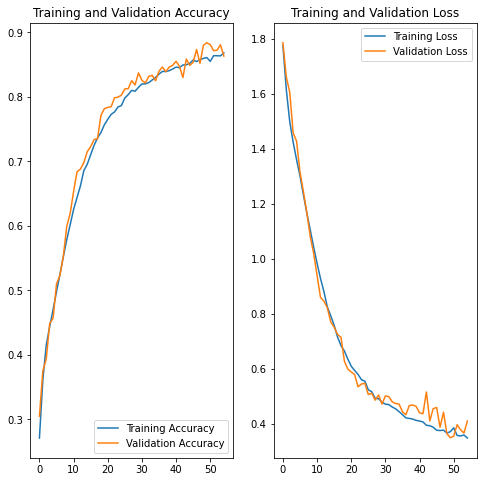

In [40]:
total_history = [history1 ,history2 , history3 , history4 , history5] # aus jedem History element werden acc und loss aufsummiert
acc=[]
val_acc = []
loss = []
val_loss = []
for history in total_history :
    acc = acc +  history['accuracy']
    val_acc = val_acc + history['val_accuracy']
    loss = loss + history['loss']
    val_loss = val_loss + history['val_loss']

#acc = his['accuracy'] #+history2.history['accuracy'] +history3.history['accuracy'] +history4.history['accuracy'] +history5.history['accuracy']
#val_acc = his['val_accuracy']# +history2.history['val_accuracy'] +history3.history['val_accuracy'] +history4.history['val_accuracy'] +history5.history['val_accuracy']

#loss = his['loss'] #+  history2.history['loss'] +  history3.history['loss'] +  history4.history['loss'] +  history5.history['loss']
#val_loss = his['val_loss']# + history2.history['val_loss'] + history3.history['val_loss'] + history4.history['val_loss'] + history5.history['val_loss']

epochs_range = range(55)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()